# Projet de RP

## Partie A

On considère les tâches sous forme de liste de durée ou de prédiction de durée. Par exemple, la liste [1, 1, 2] signifie que l'on doit ordonnancer 3 tâches de durées (ou prédictions de durées) respectives 1, 1, et 2.
On appelera coût d'un ordonnancement la somme totale des dates de fin d’exécution (dates de complétudes) de toutes
les tâches.

### PREDICTION 

#### Implémentation

In [1]:
def cumsum(liste):
    """ Calcule la somme cumulée d'une liste (afin de calculer le coût d'un ordonnancement)
    Parametres : liste une liste de durées de tâches
    Retour : la somme cumulée de cette liste
    """
    temp = 0
    res = 0
    #n = 0
    for i in liste:
        temp += i
        #n+=1
        #print("Tache ", n, "  dates de fin d’exécution :", temp)
        res = res + temp
        
    return res

In [2]:
# Tests
print("cumsum([2, 4, 5]) : ")
print(cumsum([2, 4, 5]))      # On a bien 2 + (2+4) + (2+4+5) = 2 + 6 + 11 = 19

cumsum([2, 4, 5]) : 
19


In [3]:
def indTri(liste):
    """ Calcule les indices des tâches triées de la plus petite à la plus longue selon la prédiction de leurs durées
    Parametres : liste une liste de durées prédites de tâches
    Retour : les indices des tâches triées de la plus petite à la plus longue selon la prédiction de leurs durées
    """
    indRes = [i for i in range(len(liste))]
    indRes.sort(key=lambda x: liste[x])
    
    # Autre possibilité :
    # triee = sorted(liste)
    # indRes = [] # La liste résultat d'indice
    
    # elem = 0
    # while elem < len(triee):
    #     # indElem est la liste des indices (dans liste) des tâches de longueur triee[elem]
    #     indElem = [idx for idx, e in enumerate(liste) if e == triee[elem]]
    #     indRes += indElem # On ajoute ces indices aux indices "triés"
    #     elem += len(indElem) # On passe tous les éléments de triee avec la même valeur
    
    return indRes


In [4]:
# Tests
print("indTri([5, 2, 4]) : ")
print(indTri([5, 2, 4]))     

# On a bien [1, 2, 0] car l'élément le plus faible est en position 1, 
# puis le second plus faible en position 2 et enfin le plus grand en position 0.


print("\nindTri([3, 5, 2, 2, 4, 2]) : ")
print(indTri([3, 5, 2, 2, 3, 4, 2]))     

# On a bien [{2, 3, 6}, {0, 4}, 5, 1] car l'élément le plus faible est en position 2, 3, et 6, 
# puis le second plus faible en position 0 et 4, le second plus grand en position 5 et enfin le plus grand en position 1.

indTri([5, 2, 4]) : 
[1, 2, 0]

indTri([3, 5, 2, 2, 4, 2]) : 
[2, 3, 6, 0, 4, 5, 1]


In [5]:
def prediction(pred, vrai, l=[]):
    """ Implémentation de l'algorithme PREDICTION
    Parametres : pred une liste de prédictions de durées de tâches, vrai une liste de vraies durées de tâches et optionnellement
    l qui contiendra après l'éxecution du programme les temps de fins de chaque tâche 
    Retour : l'ordonnancement des tâches de la plus petite à la plus longue en tenant compte de la prédiction de leurs durées 
    ainsi que le coût associé
    """
    
    indTrie = indTri(pred)
    
    # L'ordonnancement des tâches est la suivante :
    ordo = [vrai[i] for i in indTrie]
    
    # On récupère dans l la date de fin de chacune des tâches
    if l != []:
        temp = 0
        for i in range(len(indTrie)):
            temp += ordo[i]
            l[indTrie[i]] = temp
    
    return (ordo, cumsum(ordo))

#### Tests commentés

In [6]:
# Tests
# En supposant que la prédiction est exacte
print("prediction([5, 2, 4], [5, 2, 4]) : ")
print(prediction([5, 2, 4], [5, 2, 4]))      # On a bien le résultat voulu (voir plus haut)

dateFin = [0, 0, 0]
# En supposant que la prédiction est erronée
print("\nprediction([3, 2, 4], [5, 2, 4], l=dateFin) : ")
print(prediction([3, 2, 4], [5, 2, 4], l=dateFin))       # On a bien 2 + (2+5) + (2+5+4) = 2 + 7 + 11 = 20
print("Les dates de fins de tâches sont : ", dateFin)    # On a bien récupéré les dates de fin de tâches 

prediction([5, 2, 4], [5, 2, 4]) : 
([2, 4, 5], 19)

prediction([3, 2, 4], [5, 2, 4], l=dateFin) : 
([2, 5, 4], 20)
Les dates de fins de tâches sont :  [7, 2, 11]


### SPT 

#### Implémentation

In [7]:
def spt(vrai):
    """ Implémentation de l'algorithme SPT
    Parametres : vrai une liste de vraies durées de tâches
    Retour :  l'ordonnancement des tâches de la plus petite à la plus longue en tenant compte de leurs vraies durées ainsi que 
    le coût associé
    """
    
    # L'ordonnancement des tâches est la suivante :
    ordo = sorted(vrai)
    
    return (ordo, cumsum(ordo))

# On aurait simplement pu appeler prediction(vrai, vrai)

#### Tests

In [8]:
# Tests
print("spt([5, 2, 4]) : ")
print(spt([5, 2, 4]))     # On a bien le résultat voulu (voir plus haut)

spt([5, 2, 4]) : 
([2, 4, 5], 19)


### ROUND-ROBIN 

#### Implémentation

In [9]:
def round_robin(incon, l=[]):
    """ Implémentation de l'algorithme ROUND-ROBIN
    Parametres : incon une liste de vraies durées de tâches (qui nous est inconnue) et optionnellement l qui contiendra après 
    l'éxecution du programme les temps de fins de chaque tâche 
    Retour : le coût de l'ordonnancement avec une politique ROUND-ROBIN
    """
    
    restVrai = incon.copy() # La liste de durées restantes à executer pour chaque tâche
    
    # Les indices des tâches actives (c'est-à-dire celles qui n'ont pas fini de s'exécuter)
    indActiv = [i for i in range(len(incon))] 
    
    cout = 0
    temp = 0

    while sum(restVrai) > 0:
        # On exécute toutes les tâches actives en même temps jusqu'à ce qu'une d'elle se termine 
        if len(indActiv) > 0: # Normalement toujours vrai puisque sum(restVrai)>0 si on est là
            # On cherche la tâche la plus courte
            ind = indActiv[0]
            mini = restVrai[ind]
            for e in indActiv:
                if restVrai[e] < mini:
                    ind = e
                    mini = restVrai[e]
                   
            # On avance le temps jusqu'à ce que la tâche la plus courte termine
            temp += restVrai[ind]*len(indActiv)
            cout += temp
            #print("Tache d'indice ", ind, " fini à la date ", temp)
            # On récupère dans l la date de fin de la tâche
            if l != []:
                l[ind] = temp
            
            
            # On enlève le temps passé aux tâches actives
            uniteAchevee = restVrai[ind]
            for i in indActiv:
                restVrai[i] -= uniteAchevee

            # La tâche n'est plus active
            indActiv.remove(ind)
            
    return cout   

#### Tests commentés

In [10]:
# Tests
dateFin = [0, 0, 0]

print("round_robin([5, 2, 4], l=dateFin) : ")
print(round_robin([5, 2, 4], l=dateFin))      
# On a bien la tâche de longueur 2 qui se termine au temps 6 (puisqu'on exécute les 3 tâches en même temps)
# Au temps 6, il reste donc deux tâches nécessitant encore 2 et 3 temps d'exécution.
# La tâche de longueur 4 se termine au temps 6+4 = 10 (puisqu'on exécute les 2 tâches en même temps), 
# et celle de longueur 5 qui se termine au temps 10+1 = 11 soit un coût total de 6+10+11=27.

print("Les dates de fins de tâches sont : ", dateFin)    # On a bien récupéré les dates de fin de tâches

round_robin([5, 2, 4], l=dateFin) : 
27
Les dates de fins de tâches sont :  [11, 6, 10]


### PRED-ROUND-ROBIN  

#### Implémentation

In [11]:
def pred_round_robin(pred, vrai, lamb):
    """ Implémentation de l'algorithme PRED-ROUND-ROBIN
    Parametres : pred la liste de prédictions de durées de tâches, vrai la liste de vraies durées de tâches (inconnue avant 
    l'exécution de ces dernières) et lamb le lambda déterminant la vitesse de l'algorithme ROUND-ROBIN
    Retour : le coût de l'ordonnancement avec une politique PRED-ROUND-ROBIN
    """
    dateFinPred = [0 for i in range(len(vrai))]
    dateFinRR = [0 for i in range(len(vrai))]
    
    prediction(pred, vrai, l=dateFinPred)
    round_robin(vrai, l=dateFinRR)
    
    # Les dates de fin de tâches ont donc été mises à jour et il ne nous reste plus qu'à prendre le minimum
    dateFinPRR = [min(dateFinPred[i]/(1-lamb), dateFinRR[i]/lamb)  for i in range(len(vrai))]
    
    return sum(dateFinPRR)

#### Tests commentés

In [12]:
# Tests
# On suppose que la prédiction est exacte pour cet exemple :
print("pred_round_robin([5, 2, 4], [5, 2, 4], 1/2) : ")
print(pred_round_robin([5, 2, 4], [5, 2, 4], 1/2)) 

# On a bien les dates finales [22.0, 4.0, 12.0] puisque pour la tâche de durée 5, on a dû faire Min(22.0  ;  22.0) = 22.0,
# pour la tâche de durée 2, on a dû faire Min(4.0  ;  12.0) = 4.0 et pour la tâche de durée 4, on a dû faire 
# Min(12.0  ;  20.0) = 12.0 et la somme de ces dates fait bien 22 + 4 + 12 = 38.


# On suppose que la prédiction n'est pas exacte pour cet exemple :
print("\npred_round_robin([3, 2, 4], [5, 2, 4], 1/2) : ")
print(pred_round_robin([3, 2, 4], [5, 2, 4], 1/2)) 

# On a bien les dates finales [14.0, 4.0, 20.0] puisque pour la tâche de durée 5, on a dû faire Min(14.0  ;  22.0) = 14.0,
# pour la tâche de durée 2, on a dû faire Min(4.0  ;  12.0) = 4.0 et pour la tâche de durée 4, on a dû faire 
# Min(22.0  ;  20.0) = 20.0 et la somme de ces dates fait bien 14 + 4 + 20 = 38.

pred_round_robin([5, 2, 4], [5, 2, 4], 1/2) : 
38.0

pred_round_robin([3, 2, 4], [5, 2, 4], 1/2) : 
38.0


#### Variante

Nous avions, avant votre réponse à nos questions, un tout autre point de vue sur l'algorithme qui est le suivant : (Nous tenions à le laisser car nous avons travaillé sur cet algorithme et que nous le trouvons interessant et plus performant)

In [13]:
def pred_round_robin2(pred, vrai, lamb):
    """ Implémentation de notre version de l'algorithme PRED-ROUND-ROBIN
    
    Ici les deux algorithmes prediction et round-robin sont exécutés "en même temps" 
    avec une distribution du temps machine égal à lambda. De cette manière, dès qu'une tâche est terminée soit par 
    prediction soit par round-robin, elle est retirée des tâches actives pour les deux algorithmes.
    
    Parametres : pred la liste de prédictions de durées de tâches, vrai la liste de vraies durées de tâches 
    (inconnue avant l'exécution de ces dernières) et lamb le lambda déterminant la vitesse de l'algorithme 
    ROUND-ROBIN
    Retour : le coût de l'ordonnancement avec une politique PRED-ROUND-ROBIN
    """

    restVrai = vrai.copy() # La liste de durées restantes à executer pour chaque tâche
    restPred = pred.copy() # La liste de durées restantes prédites à executer pour chaque tâche
    
    # Les indices des tâches actives (c'est-à-dire celles qui n'ont pas fini de s'exécuter)
    indActiv = [i for i in range(len(vrai))] 
    
    cout = 0
    temp = 0

    while sum(restVrai) > 0:
        # On exécute toutes les tâches actives en même temps jusqu'à ce qu'une d'elle se termine
        if len(indActiv) > 0: # Normalement toujours vrai puisque sum(restVrai)>0 si on est là
            # indPred l'indice de la tâche traitée par prédiction et ind l'indice de la tâche la plus courte
            indPred = indActiv[0]
            miniPred = restPred[indPred]
            ind = indActiv[0]
            mini = restVrai[ind]
            for e in indActiv:
                if restPred[e] < miniPred:
                    indPred = e
                    miniPred = restPred[e]
                if restVrai[e] < mini:
                    ind = e
                    mini = restVrai[e]
                
            # Calcul de tâche qui finira en premier(soit celle avec le min durée restante soit celle exécutée dans 
            # prediction)
            # La tâche la plus courte, (pas celle exécutée par prédiction) finit en restVrai[ind]*len(indActiv)/lamb
            # La tâche exécutée dans prediction finit en restVrai[indPred]/(1-lamb + lamb/len(indActiv)) 
            dateCourte = restVrai[ind]*len(indActiv)/lamb 
            datePred = restVrai[indPred]/(1-lamb + lamb/len(indActiv))
            
            if ind == indPred:
                indFirst = ind
                dateFirst = datePred
            else:
                if dateCourte < datePred:
                    indFirst = ind
                    dateFirst = dateCourte
                else:
                    indFirst = indPred
                    dateFirst = datePred
            
            # La tâche la plus courte s'est terminée
            temp += dateFirst
            cout += temp
            #print("Tache d'indice ", indFirst, " fini à la date ", temp)

            # On enlève le temps passé aux tâches actives
            for i in indActiv:
                restVrai[i] -= lamb*dateFirst/len(indActiv)
                restPred[i] -= lamb*dateFirst/len(indActiv)
            restVrai[indPred] -= (1-lamb)*dateFirst
            restPred[indPred] -= (1-lamb)*dateFirst
            restVrai[indFirst] = 0 # Afin d'éviter les erreurs d'arrondi

            # La tâche n'est plus active
            indActiv.remove(indFirst)
            
    return cout

#### Tests commentés

In [14]:
# Tests
# On suppose que la prédiction est exacte pour cet exemple :
print("pred_round_robin2([5, 2, 4], [5, 2, 4], 1/2) : ")
print(pred_round_robin2([5, 2, 4], [5, 2, 4], 1/2)) 

# On a bien la tâche de longueur 2 qui se termine au temps 3 
# (puisqu'on exécute les 3 tâches en même temps pour ROUND-ROBIN et que cette tâche est en tête des prédictions: 
# 1/2*1/3 + 1/2 = 4/6 = 2/3 par unité de temps pour cette tâche et 3*2/3 = 2)

# Au temps 3, il reste donc deux tâches nécessitant encore 4-3/6 = 3.5 et 5-3/6 = 4.5 temps d'exécution.

# La tâche de longueur 4 (temps restant = 3.5) se termine au temps 4.66 + 3 = 7.66  
# (puisqu'on exécute les 2 tâches en même temps pour ROUND-ROBIN et que cette tâche est en tête des prédictions: 
# 1/2*1/2 + 1/2 = 3/4 par unité de temps pour cette tâche et 4.66*3/4 = 3.5)

# Au temps 7.66, il reste donc une tâche nécessitant encore 4.5-4.66/4 = 3.34 temps d'exécution.

# La tâche de longueur 5 (temps restant = 3.34) se termine au temps 11
# (puisqu'on l'exécute seule: 1 par unité de temps pour cette tâche)

# Soit un coût total de 3 + 7.66 + 11 = 21.66.


# On suppose que la prédiction n'est pas exacte pour cet exemple :
print("\npred_round_robin2([3, 2, 4], [5, 2, 4], 1/2) : ")
print(pred_round_robin2([3, 2, 4], [5, 2, 4], 1/2)) 

# On a bien la tâche de longueur 2 qui se termine au temps 3 
# (puisqu'on exécute les 3 tâches en même temps pour ROUND-ROBIN et que cette tâche est en tête des prédictions: 
# 1/2*1/3 + 1/2 = 4/6 = 2/3 par unité de temps pour cette tâche et 3*2/3 = 2)

# Au temps 3, il reste donc deux tâches nécessitant encore 4-3/6 = 3.5 et 5-3/6 = 4.5 temps d'exécution.

# La tâche de longueur 5 (temps restant = 4.5 = 9/2) se termine au temps 6+3 = 9
# (puisqu'on exécute les 2 tâches en même temps pour ROUND-ROBIN et que cette tâche est en tête des prédictions (faussées): 
# 1/2*1/2 + 1/2 = 3/4 par unité de temps pour cette tâche et 6*3/4 = 18/4  = 9/2)

# Au temps 9, il reste donc une tâche nécessitant encore 3.5-6/4 = 7/2-6/4 = 8/4 = 2 temps d'exécution.

# La tâche de longueur 4 (temps restant = 2) se termine au temps 2+9 = 11
# (puisqu'on l'exécute seule: 1 par unité de temps pour cette tâche)

# Soit un coût total de 3+9+11 = 23.


# On prend un autre lambda :
print("\npred_round_robin2([5, 2, 4], [5, 2, 4], 1/4) : ")
print(pred_round_robin2([5, 2, 4], [5, 2, 4], 1/4)) 

# On a bien la tâche de longueur 2 qui se termine au temps 2.4  
# (puisqu'on exécute les 3 tâches en même temps pour ROUND-ROBIN et que cette tâche est en tête des prédictions: 
# 1/4*1/3 + 3/4 = 10/12 = 5/6 par unité de temps pour cette tâche et 2.4*5/6 = 2)

# Au temps 3, il reste donc deux tâches nécessitant encore 4-2.4/12 = 3.8 et 5-2.4/12 = 4.8 temps d'exécution.

# La tâche de longueur 4 (temps restant = 3.8) se termine au temps 2.4 + 4.34 = 6.74 
# (puisqu'on exécute les 2 tâches en même temps pour ROUND-ROBIN et que cette tâche est en tête des prédictions: 
# 1/4*1/2 + 3/4 = 7/8 par unité de temps pour cette tâche et 4.34*7/8 = 3.8)

# Au temps 6.74, il reste donc une tâche nécessitant encore 4.8-4.34/8 = 4.26 temps d'exécution.

# La tâche de longueur 5 (temps restant = 4.26) se termine au temps 6.74 + 4.26 = 11 
# (puisqu'on l'exécute seule: 1 par unité de temps pour cette tâche)

# Soit un coût total de 2.4 + 6.74 + 11 = 20.14.

pred_round_robin2([5, 2, 4], [5, 2, 4], 1/2) : 
21.666666666666668

pred_round_robin2([3, 2, 4], [5, 2, 4], 1/2) : 
23.0

pred_round_robin2([5, 2, 4], [5, 2, 4], 1/4) : 
20.142857142857142


## Partie B

Pour adapter les algorithmes vus à la première partie dans le cas avec prédictions, il suffit de donner à chaque
instant la priorité à la tâche dont la durée restante *prédite* (c'est à dire la durée prédite de la tâche - la durée déjà effectuée) est la plus faible.

### PREDICTION 

#### Implémentation

In [15]:
def predictionB(pred, vrai, arr, l=[]):
    """ Implémentation de l'algorithme PREDICTION avec des dates d'arrivées
    Parametres : pred une liste de prédictions de durées de tâches, vrai une liste de vraies durées de tâches, arr une liste de 
    temps d'arrivée des tâches, et optionnellement l qui contiendra après l'éxecution du programme les temps de fins de chaque 
    tâche 
    Retour : le coût de l'ordonnancement prenant en compte les prédictions
    """
    restVrai = vrai.copy() # La liste de durées restantes à executer pour chaque tâche
    restPred = pred.copy() # La liste des durées restantes prédites pour chaque tâche
    
    # Les indices des tâches actives (càd celles qui sont déjà arrivées et qui n'ont pas fini de s'exécuter)
    indActiv = [idx for idx, e in enumerate(arr) if e == 0] 
    
    # Les dates d'arrivées futures
    dateArr = set(arr)
    
    if len(indActiv) > 0:
        dateArr.remove(0)
    
    cout = 0
    temp = 0

    while sum(restVrai) > 0:
        # On exécute la tâche dont la durée restante PREDITE est la plus faible (parmi les tâches actives)
        if len(indActiv) > 0:
            # On cherche la tâche la plus courte
            ind = indActiv[0]
            mini = restPred[ind]
            for e in indActiv:
                if restPred[e] < mini:
                    ind = e
                    mini = restPred[e]
                   
            # On avance le temps jusqu'à ce qu'une nouvelle tâche arrive ou que la tâche dont on s'occupe termine
            if len(dateArr) > 0 and min(dateArr)-temp < restVrai[ind]:
                # Une nouvelle tâche arrive
                # On enlève le temps passé à la tâche sélectionnée
                restVrai[ind] -= (min(dateArr)-temp)
                restPred[ind] -= (min(dateArr)-temp)
                
                # Mise à jour du temps
                temp = min(dateArr)
                
                # On ajoute les tâches de date d'arrivée atteinte
                indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                dateArr.remove(min(dateArr))

            else:
                # La tâche en cours d'exécution s'est terminée
                temp += restVrai[ind]
                cout += temp
                #print("Tache d'indice ", ind, " fini à la date ", temp)
                # On récupère dans l la date de fin de la tâche
                if l != []:
                    l[ind] = temp
                    
                # On enlève le temps passé à la tâche sélectionnée
                restVrai[ind] = 0
                restPred[ind] = 0
                
                # La tâche n'est plus active
                indActiv.remove(ind)
                
                # Si il y a de nouvelles tâches, on les ajoutes
                if len(dateArr) > 0 and min(dateArr) - temp == 0:
                    # On ajoute les tâches de date d'arrivée atteinte
                    indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                    dateArr.remove(min(dateArr))
                
        else:
            # Il n'y a pas de tâche active et on avance jusqu'à la prochaine arrivée de tâche
            if len(dateArr) == 0: # Toutes les tâches sont arrivées
                # Normalement on n'entre jamais ici car sum(restVrai) serait égal à 0
                return cout
            
            # On met le temps à jour
            temp = min(dateArr)
            # On ajoute les tâches de date d'arrivée atteinte
            #print("Il existe un temps de latence à cause de l'arrivée tardive d'une tâche")
            indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
            dateArr.remove(min(dateArr))
            
    return cout

#### Tests commentés

In [16]:
# Tests
# En supposant que la prédiction est exacte
print("predictionB([5, 2, 4], [5, 2, 4], [0, 1, 0]) : ")
print(predictionB([5, 2, 4], [5, 2, 4], [0, 1, 0]))

# En effet, du temps 0 au temps 1, on exécute la tâche de durée 4 et la tâche de durée 2 arrive, il reste donc les durées 
# [5, 2, 3]. Puis du temps 1 au temps 3 on exécute la tâche de durée 2 (coût de 3), puis on exécute la tâche de durée 4 
# (3 restant) entre les temps 3 et 6 (coût de 6). Enfin, on exécute la tâche de durée 5 entre les temps 6 et 11 (coût de 11).
# Soit un coût total de 3 + 6 + 11 = 20.

# En supposant que la prédiction est erronée
print("\npredictionB([3, 2, 4], [5, 2, 4], [0, 1, 0]) : ")
print(predictionB([3, 2, 4], [5, 2, 4], [0, 1, 0]))

# En effet, du temps 0 au temps 1, on exécute la tâche de durée 5 et la tâche de durée 2 arrive, il reste donc les durées 
# [4, 2, 4] mais on a prédit qu'il restait les durées [2, 2, 4]. Puis du temps 1 au temps 5 on exécute encore la tâche de durée
# 5 (coût de 5), puis on exécute la tâche de durée 2 entre les temps 5 et 7 (coût de 7). Enfin, on exécute la tâche de durée 4 
# entre les temps 7 et 11 (coût de 11).
# Soit un coût total de 5 + 7 + 11 = 23.

dateFin = [0, 0, 0]
# Dernier test avec un temps de latence
print("\npredictionB([1, 2, 4], [1, 2, 4], [0, 0, 4], l=dateFin) : ")
print(predictionB([1, 2, 4], [1, 2, 4], [0, 0, 4], l=dateFin))

# En effet, du temps 0 au temps 1, on exécute la tâche de durée 1 (coût de 1) puis la tâche de durée 2 (coût de 3), il reste 
# donc la tâche de durée 4 mais elle n'est pas encore arrivée.
# On attend donc une unité de temps avant qu'elle n'arrive puis on l'exécute du temps 4 au temps 8  de durée (coût de 8)
# Soit un coût total de 1 + 3 + 8 = 12.

print("Les dates de fins de tâches sont : ", dateFin)    # On a bien récupéré les dates de fin de tâches

predictionB([5, 2, 4], [5, 2, 4], [0, 1, 0]) : 
20

predictionB([3, 2, 4], [5, 2, 4], [0, 1, 0]) : 
23

predictionB([1, 2, 4], [1, 2, 4], [0, 0, 4], l=dateFin) : 
12
Les dates de fins de tâches sont :  [1, 3, 8]


### SPT 

#### Implémentation

In [17]:
def sptB(vrai, arr):
    """ Implémentation de l'algorithme SPT avec des dates d'arrivées
    Parametres : vrai une liste de vraies durées de tâches, et arr une liste de temps d'arrivée des tâches
    Retour :  le coût de l'ordonnancement
    """
    
    restVrai = vrai.copy() # La liste de durées restantes à executer pour chaque tâche
    
    # Les indices des tâches actives (càd celles qui sont déjà arrivées et qui n'ont pas fini de s'exécuter)
    indActiv = [idx for idx, e in enumerate(arr) if e == 0] 
    
    # Les dates d'arrivées futures
    dateArr = set(arr) 
    
    if len(indActiv) > 0:
        dateArr.remove(0)
    
    cout = 0
    temp = 0

    while sum(restVrai) > 0:
        # On exécute la tâche dont la durée restante est la plus faible (parmi les tâches actives)
        if len(indActiv) > 0:
            # On cherche la tâche la plus courte
            ind = indActiv[0]
            mini = restVrai[ind]
            for e in indActiv:
                if restVrai[e] < mini:
                    ind = e
                    mini = restVrai[e]
                   
            # On avance le temps jusqu'à ce qu'une nouvelle tâche arrive ou que la tâche dont on s'occupe termine
            if len(dateArr) > 0 and min(dateArr)-temp < restVrai[ind]:
                # Une nouvelle tâche arrive
                # On enlève le temps passé à la tâche sélectionnée
                restVrai[ind] -= (min(dateArr)-temp)
                
                # Mise à jour du temps
                temp = min(dateArr)
                
                # On ajoute les tâches de date d'arrivée atteinte
                indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                dateArr.remove(min(dateArr))

            else:
                # La tâche en cours d'exécution s'est terminée
                temp += restVrai[ind]
                cout += temp
                #print("Tache d'indice ", ind, " fini à la date ", temp)
                
                # On enlève le temps passé à la tâche sélectionnée
                restVrai[ind] = 0
                
                # La tâche n'est plus active
                indActiv.remove(ind)
                
                # Si il y a de nouvelles tâches, on les ajoutes
                if len(dateArr) > 0 and min(dateArr) - temp == 0:
                    # On ajoute les tâches de date d'arrivée atteinte
                    indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                    dateArr.remove(min(dateArr))
                
        else:
            # Il n'y a pas de tâche active et on avance jusqu'à la prochaine arrivée de tâche
            if len(dateArr) == 0: # Toutes les tâches sont arrivées
                # Normalement on n'entre jamais ici car sum(restVrai) serait égal à 0
                return cout
            
            # On met le temps à jour
            temp = min(dateArr)
            # On ajoute les tâches de date d'arrivée atteinte
            #print("Il existe un temps de latence à cause de l'arrivée tardive d'une tâche")
            indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
            dateArr.remove(min(dateArr))
            
    return cout

# On aurait simplement pu appeler predictionB(vrai, vrai, arr)

#### Tests

In [18]:
# Tests
print("sptB([5, 2, 4], [0, 1, 0]) : ")
print(sptB([5, 2, 4], [0, 1, 0]))     # On a bien le résultat voulu (voir plus haut)

sptB([5, 2, 4], [0, 1, 0]) : 
20


### ROUND-ROBIN  

#### Implémentation

In [19]:
def round_robinB(incon, arr, l=[]):
    """ Implémentation de l'algorithme ROUND-ROBIN avec des dates d'arrivées
    Parametres : incon une liste de vraies durées de tâches (qui nous est inconnue), arr liste de temps d'arrivée des tâches et 
    optionnellement l qui contiendra après l'éxecution du programme les temps de fins de chaque tâche 
    Retour : le coût de l'ordonnancement avec une politique ROUND-ROBIN
    """
    restVrai = incon.copy() # La liste de durées restantes à executer pour chaque tâche
    
    # Les indices des tâches actives (càd celles qui sont déjà arrivées et qui n'ont pas fini de s'exécuter)
    indActiv = [idx for idx, e in enumerate(arr) if e == 0] 
    
    # Les dates d'arrivées futures
    dateArr = set(arr) 
    
    if len(indActiv) > 0:
        dateArr.remove(0)
    
    cout = 0
    temp = 0

    while sum(restVrai) > 0:
        # On exécute toutes les tâches actives en mm temps jusqu'à ce qu'une d'elle se termine ou qu'une nouvelle tâche arrive
        if len(indActiv) > 0:
            # On cherche la tâche la plus courte
            ind = indActiv[0]
            mini = restVrai[ind]
            for e in indActiv:
                if restVrai[e] < mini:
                    ind = e
                    mini = restVrai[e]
                   
            # On avance le temps jusqu'à ce qu'une nouvelle tâche arrive ou que la tâche la plus courte termine
            if len(dateArr) > 0 and min(dateArr)-temp < restVrai[ind]*len(indActiv):
                # Une nouvelle tâche arrive
                # On enlève le temps passé aux tâches actives
                for i in indActiv:
                    restVrai[i] -= (min(dateArr)-temp)/len(indActiv)
                
                # Mise à jour du temps
                temp = min(dateArr)
                
                # On ajoute les tâches de date d'arrivée atteinte
                indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                dateArr.remove(min(dateArr))

            else:
                # La tâche la plus courte s'est terminée
                temp += restVrai[ind]*len(indActiv)
                cout += temp
                #print("Tache d'indice ", ind, " fini à la date ", temp)
                # On récupère dans l la date de fin de la tâche
                if l != []:
                    l[ind] = temp
                    
                # On enlève le temps passé aux tâches actives
                uniteAchevee = restVrai[ind]
                for i in indActiv:
                    restVrai[i] -= uniteAchevee
                
                # La tâche n'est plus active
                indActiv.remove(ind)
                
                # Si il y a de nouvelles tâches, on les ajoutes
                if len(dateArr) > 0 and min(dateArr) - temp == 0:
                    # On ajoute les tâches de date d'arrivée atteinte
                    indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                    dateArr.remove(min(dateArr))
                
        else:
            # Il n'y a pas de tâche active et on avance jusqu'à la prochaine arrivée de tâche
            if len(dateArr) == 0: # Toutes les tâches sont arrivées
                # Normalement on n'entre jamais ici car sum(restVrai) serait égal à 0
                return cout
            
            # On met le temps à jour
            temp = min(dateArr)
            # On ajoute les tâches de date d'arrivée atteinte
            #print("Il existe un temps de latence à cause de l'arrivée tardive d'une tâche")
            indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
            dateArr.remove(min(dateArr))
            
    return cout   

#### Tests commentés

In [20]:
# Tests
dateFin = [0, 0, 0]
print("round_robinB([5, 2, 4], [0, 1, 0], l=dateFin) : ")
print(round_robinB([5, 2, 4], [0, 1, 0], l=dateFin))   

# En effet, du temps 0 au temps 1, les tâches 5 et 4 sont exécutées à hauteur de 1/2 par unité de temps. 
# La tâche de durée 2 arrive et il reste donc les durées d'exécution [4.5, 2, 3.5].
# Puis les 3 tâches s'exécutent en même temps jusqu'à ce que celle de durée 2 finisse. Il lui faut 6 unités de temps (coût 7).
# Il reste donc 2 tâches de durée respective 2.5 et 1.5.
# Les 2 tâches s'exécutent en même temps jusqu'à ce que celle de durée 4 finisse. Il lui faut 3 unités de temps (coût de 10).
# Il ne reste donc plus qu'une tâche nécessitant encore 1 unité de temps d'execution (coût 11).
# Soit un coût total de 7+10+11 = 28.

print("Les dates de fins de tâches sont : ", dateFin)    # On a bien récupéré les dates de fin de tâches

round_robinB([5, 2, 4], [0, 1, 0], l=dateFin) : 
28.0
Les dates de fins de tâches sont :  [11.0, 7, 10.0]


### PRED-ROUND-ROBIN  

#### Implémentation

In [21]:
def pred_round_robinB(pred, vrai, arr, lamb):
    """ Implémentation de l'algorithme PRED-ROUND-ROBIN
    Parametres : pred la liste de prédictions de durées de tâches, vrai la liste de vraies durées de tâches (inconnue avant 
    l'exécution de ces dernières), arr une liste de temps d'arrivée des tâches et lamb le lambda déterminant la vitesse de 
    l'algorithme ROUND-ROBIN
    Retour : le coût de l'ordonnancement avec une politique PRED-ROUND-ROBIN
    """
    dateFinPred = [0 for i in range(len(vrai))]
    dateFinRR = [0 for i in range(len(vrai))]
    
    predictionB(pred, vrai, arr, l=dateFinPred)
    round_robinB(vrai, arr, l=dateFinRR)
    
    # Les dates de fin de tâches ont donc été mises à jour et il ne nous reste plus qu'à prendre le minimum
    dateFinPRR = [min(dateFinPred[i]/(1-lamb), dateFinRR[i]/lamb)  for i in range(len(vrai))]
    
    return sum(dateFinPRR)

#### Tests commentés

In [22]:
# Tests
# On suppose que la prédiction est exacte pour cet exemple :
print("pred_round_robinB([5, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : ")
print(pred_round_robinB([5, 2, 4], [5, 2, 4], [0, 1, 0], 1/2)) 

# On a bien les dates finales [22.0, 6.0, 12.0] puisque pour la tâche de durée 5, on a dû faire Min(22.0  ;  22.0) = 22.0,
# pour la tâche de durée 2, on a dû faire Min(6.0  ;  14.0) = 6.0 et pour la tâche de durée 4, on a dû faire 
# Min(12.0  ;  20.0) = 12.0 et la somme de ces dates fait bien 22 + 6 + 12 = 40.

# On suppose que la prédiction n'est pas exacte pour cet exemple :
print("\npred_round_robinB([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : ")
print(pred_round_robinB([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/2)) 

# On a bien les dates finales [10.0, 14.0, 20.0] puisque pour la tâche de durée 5, on a dû faire Min(10.0  ;  22.0) = 10.0,
# pour la tâche de durée 2, on a dû faire Min(14.0  ;  14.0) = 14.0 et pour la tâche de durée 4, on a dû faire 
# Min(22.0  ;  20.0) = 20.0 et la somme de ces dates fait bien 10 + 14 + 20 = 44.

# On prend un autre lambda :
print("\npred_round_robinB([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/3) : ")
print(pred_round_robinB([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/3))

# On a bien les dates finales [7.5, 10.5, 16.5] puisque pour la tâche de durée 5, on a dû faire Min(7.5  ;  33.0) = 7.5,
# pour la tâche de durée 2, on a dû faire Min(10.5  ;  21.0) = 10.5 et pour la tâche de durée 4, on a dû faire 
# Min(16.5  ;  30.0) = 16.5 et la somme de ces dates fait bien 7.5 + 10.5 + 16.5 = 34.5.

pred_round_robinB([5, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : 
40.0

pred_round_robinB([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : 
44.0

pred_round_robinB([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/3) : 
34.49999999999999


#### Variante

In [23]:
# Nous avions, avant votre réponse, un tout autre point de vue sur l'algorithme qui est le suivant :
# (Nous tenions à le laisser car nous avons travaillé sur cet algorithme et que nous le trouvons interessant et plus performant)

def pred_round_robinB2(pred, vrai, arr, lamb):
    """ Implémentation de notre version de l'algorithme PRED-ROUND-ROBIN avec des dates d'arrivées
    Parametres : pred la liste de prédictions de durées de tâches, vrai la liste de vraies durées de tâches (inconnue avant 
    l'exécution de ces dernières), arr une liste de temps d'arrivée des tâches et lamb le lambda déterminant la vitesse de 
    l'algorithme ROUND-ROBIN
    Retour : le coût de l'ordonnancement avec une politique PRED-ROUND-ROBIN
    """
    
    restVrai = vrai.copy() # La liste de durées restantes à executer pour chaque tâche
    restPred = pred.copy() # La liste de durées restantes prédites à executer pour chaque tâche
    
    # Les indices des tâches actives (càd celles qui sont déjà arrivées et qui n'ont pas fini de s'exécuter)
    indActiv = [idx for idx, e in enumerate(arr) if e == 0] 
    
    # Les dates d'arrivées futures
    dateArr = set(arr) 
    
    if len(indActiv) > 0:
        dateArr.remove(0)
    
    cout = 0
    temp = 0

    while sum(restVrai) > 0:
        # On exécute toutes les tâches actives en mm temps jusqu'à ce qu'une d'elle se termine ou qu'une nouvelle tâche arrive
        if len(indActiv) > 0:
            # indPred l'indice de la tâche traitée par prédiction et ind l'indice de la tâche la plus courte
            indPred = indActiv[0]
            miniPred = restPred[indPred]
            ind = indActiv[0]
            mini = restVrai[ind]
            for e in indActiv:
                if restPred[e] < miniPred:
                    indPred = e
                    miniPred = restPred[e]
                if restVrai[e] < mini:
                    ind = e
                    mini = restVrai[e]
                
            # Calcul de tâche qui finira en premier(soit celle avec le min durée restante soit celle exécutée dans prediction)
            # La tâche la plus courte, (pas celle exécutée par prédiction) finit en restVrai[ind]*len(indActiv)/lamb
            # La tâche exécutée dans prediction finit en restVrai[indPred]/(1-lamb + lamb/len(indActiv)) 
            dateCourte = restVrai[ind]*len(indActiv)/lamb 
            datePred = restVrai[indPred]/(1-lamb + lamb/len(indActiv))
            
            if ind == indPred:
                indFirst = ind
                dateFirst = datePred
            else:
                if dateCourte < datePred:
                    indFirst = ind
                    dateFirst = dateCourte
                else:
                    indFirst = indPred
                    dateFirst = datePred
            
            # On avance le temps jusqu'à ce qu'une nouvelle tâche arrive ou que une tâche termine
            if len(dateArr) > 0 and min(dateArr)-temp < dateFirst:
                # Une nouvelle tâche arrive
                # On enlève le temps passé aux tâches actives
                for i in indActiv:
                    restVrai[i] -= lamb*(min(dateArr)-temp)/len(indActiv)
                    restPred[i] -= lamb*(min(dateArr)-temp)/len(indActiv)
                    
                restVrai[indPred] -= (1-lamb)*(min(dateArr)-temp)
                restPred[indPred] -= (1-lamb)*(min(dateArr)-temp)
                
                # Mise à jour du temps
                temp = min(dateArr)
                
                # On ajoute les tâches de date d'arrivée atteinte
                indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                dateArr.remove(min(dateArr))

            else:
                # La tâche la plus courte s'est terminée
                temp += dateFirst
                cout += temp
                #print("Tache d'indice ", indFirst, " fini à la date ", temp)
                
                # On enlève le temps passé aux tâches actives
                for i in indActiv:
                    restVrai[i] -= lamb*dateFirst/len(indActiv)
                    restPred[i] -= lamb*dateFirst/len(indActiv)
                restVrai[indPred] -= (1-lamb)*dateFirst
                restPred[indPred] -= (1-lamb)*dateFirst
                restVrai[indFirst] = 0 # Afin d'éviter les erreurs d'arrondi
                
                # La tâche n'est plus active
                indActiv.remove(indFirst)
                
                # Si il y a de nouvelles tâches, on les ajoutes
                if len(dateArr) > 0 and min(dateArr) - temp == 0:
                    # On ajoute les tâches de date d'arrivée atteinte
                    indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
                    dateArr.remove(min(dateArr))
                
        else:
            # Il n'y a pas de tâche active et on avance jusqu'à la prochaine arrivée de tâche
            if len(dateArr) == 0: # Toutes les tâches sont arrivées
                # Normalement on n'entre jamais ici car sum(restVrai) serait égal à 0
                return cout
            
            # On met le temps à jour
            temp = min(dateArr)
            # On ajoute les tâches de date d'arrivée atteinte
            #print("Il existe un temps de latence à cause de l'arrivée tardive d'une tâche")
            indActiv += [idx for idx, e in enumerate(arr) if e == min(dateArr)]
            dateArr.remove(min(dateArr))
            
    return cout

In [24]:
# Tests
# On suppose que la prédiction est exacte pour cet exemple :
print("pred_round_robinB2([5, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : ")
print(pred_round_robinB2([5, 2, 4], [5, 2, 4], [0, 1, 0], 1/2)) 

# En effet, du temps 0 au temps 1, les tâches 5 et 4 sont exécutées à hauteur respective de 1/4 et 3/4 par unité de temps. 
# La tâche de durée 2 arrive et il reste donc les durées d'exécution [4.75, 2, 3.25].
# Puis les 3 tâches s'exécutent en même temps à hauteur respective de 1/6, 2/3 et 1/6 par unité de temps jusqu'à ce que celle
# de durée 2 finisse. Il lui faut 3 unités de temps puisque 3*2/3 = 2 (coût 4).
# Il reste donc 2 tâches de durée respective 4.75 - 1/2 = 4.25 et 3.25 - 1/2 = 2.75.
# Les 2 tâches s'exécutent en même temps à hauteur respective de 1/4 et 3/4 par unité de temps jusqu'à ce que celle de durée 4 
# finisse. Il lui faut 3.6667 unités de temps puisque 3.6667*3/4 = 2.75 (coût de 7.6667).
# Il ne reste donc plus qu'une tâche nécessitant encore 4.25 - 3.6667/4 = 3.3333 unité de temps d'execution (coût 11).
# Soit un coût total de 4+7.6667+11 = 22.6667.


# On suppose que la prédiction n'est pas exacte pour cet exemple :
print("\npred_round_robinB2([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : ")
print(pred_round_robinB2([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/2)) 

# En effet, du temps 0 au temps 1, les tâches 5 et 4 sont exécutées à hauteur respective de 3/4 et 1/4 par unité de temps. 
# La tâche de durée 2 arrive et il reste donc les durées d'exécution [4.25, 2, 3.75].
# Puis les 3 tâches s'exécutent en même temps à hauteur respective de 1/6, 2/3 et 1/6 par unité de temps jusqu'à ce que celle 
# de durée 2 finisse. Il lui faut 3 unités de temps puisque 3*2/3 = 2 (coût 4).
# Il reste donc 2 tâches de durée respective 4.25 - 1/2 = 3.75 et 3.75 - 1/2 = 3.25.
# Les 2 tâches s'exécutent en même temps à hauteur respective de 3/4 et 1/4 par unité de temps jusqu'à ce que celle de durée 5 
# finisse. Il lui faut 5 unités de temps puisque 5*3/4 = 3.75 (coût de 9).
# Il ne reste donc plus qu'une tâche nécessitant encore 3.25 - 5/4 = 2 unités de temps d'execution (coût 11).
# Soit un coût total de 4+9+11 = 24.


# On prend un autre lambda :
print("\npred_round_robinB2([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/3) : ")
print(pred_round_robinB2([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/3))

# En effet, du temps 0 au temps 1, les tâches 5 et 4 sont exécutées à hauteur respective de 5/6 et 1/6 par unité de temps. 
# La tâche de durée 2 arrive et il reste donc les durées d'exécution [4.17, 2, 3.83].
# Puis les 3 tâches s'exécutent en même temps à hauteur respective de 1/9, 7/9 et 1/9 par unité de temps jusqu'à ce que celle 
# de durée 2 finisse. Il lui faut 2.57 unités de temps puisque 2.57*7/9 = 2 (coût de 3.57).
# Il reste donc 2 tâches de durée respective 4.17 - 2.57/9 = 3.88 et 3.83 - 2.57/9 = 3.54.
# Les 2 tâches s'exécutent en même temps à hauteur respective de 5/6 et 1/6 par unité de temps jusqu'à ce que celle de durée 5 
# finisse. Il lui faut 4.66 unités de temps puisque 4.66*5/6 = 3.88 (coût de 8.23).
# Il ne reste donc plus qu'une tâche nécessitant encore 3.54 - 4.66/6 = 2.77 unités de temps d'execution (coût 11).
# Soit un coût total de 3.57 + 8.23 + 11 = 22.8.

pred_round_robinB2([5, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : 
22.666666666666664

pred_round_robinB2([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/2) : 
24.0

pred_round_robinB2([3, 2, 4], [5, 2, 4], [0, 1, 0], 1/3) : 
22.799999999999997


## Simulations

### Fonctions préalables

#### Pour la génération des données

In [25]:
import numpy as np

nbTaches = 50
alpha = 1.1
sigma = 1.5 # Afin d'avoir des prédictions pas trop proches de la réalité

vrai = [np.random.pareto(alpha) for i in range(nbTaches)]
bruit = np.random.randn(nbTaches)*sigma
pred = [round(vrai[i] + bruit[i], 2) for i in range(nbTaches)]

# On vérifie qu'aucune prédiction n'est négative :
for i in range(len(pred)):
    if pred[i]<0:
        pred[i] = 0

print("Vrai = ", vrai)
print("\nPred = ", pred)

Vrai =  [1.9352949442938665, 0.05919658331041111, 0.20709625993441683, 2.494677915700897, 1.3986592424794209, 6.813322310608207, 0.16322792840693912, 2.15914278008287, 0.23379339843756886, 1.5077844036956756, 0.7194998135629747, 1.3427853907760285, 14.479742340094583, 1.2014376997891292, 0.7878592703455707, 0.29786511481585753, 6.650771424371219, 0.8841708421551493, 0.2682460905854043, 0.6746392691054237, 0.19563666221479892, 14.37724679843469, 5.403522843180984, 0.016458653800540457, 0.7330168956627623, 3.8837924538953734, 1.8470929138793304, 0.6062068435571946, 0.060170227570555124, 0.30360472832915564, 0.03774303577800975, 0.20527099952103556, 14.94647831339523, 0.15306004117426375, 2.0772244874028756, 1.2485090124489049, 0.6710123998217399, 1.4427563115287327, 94.96652690374927, 8.218866321497606, 1.2513918742675738, 0.03828905266640881, 1.1179114046775709, 38.15790944568062, 0.0402402684669223, 2.060582400781438, 2.482861439346333, 0.018717010875102025, 0.1137349009411679, 0.21994

In [26]:
def erreur_prediction(pred, vrai):
    """ Calcule l'erreur de prédiction
    Parametres : pred la liste de prédictions de durées de tâches, vrai la liste de vraies durées de tâches 
    Retour : l'erreur de prédiction
    """
    res = 0
    for i in range(len(pred)):
        res += abs(pred[i] - vrai[i])
        
    return res

In [27]:
# Tests 
print("erreur_prediction(pred, vrai) : ")
print(erreur_prediction(pred, vrai))

erreur_prediction(pred, vrai) : 
48.74874142209678


#### Pour la comparaison des algorithmes

In [28]:
# Pour chaque algorithme calculons le rapport de compétitivité en fonction de l’erreur de prédiction

import matplotlib.pyplot as plt

In [29]:
def show_multiple_sims(XYlegendes):
    for _ in XYlegendes:
        X, Y, legende = _
        plt.plot([X[s] for s in range(len(X[:-1])) if Y[s] != 0], [y for y in Y if y != 0] , label=legende)
        #plt.plot(X, Y, label=legende)

        plt.xlabel('Erreur de prédiction')
        plt.ylabel('Rapport de compétitivité')
        #plt.legend(loc='best')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

In [30]:
def simulation2(OPT, f=prediction, nbTaches=50, nbPoints=20000, 
                lamb=1/2, partie="A", legende="Prediction", sigma=1.5, alpha=1.1):
    """Cette fonction renvoie le rapport de compétitivité de f en fonction des erreurs de prédiction. 
    Les différentes valeurs de rapports de compétitivité sont triées par classes de valeurs d'erreurs de prédiction. 
    De ces classes sont tirés les maxima qui seront alors les valeurs de rapports de compétitivité renvoyées.
    """
    ## Génération des x
    vrai_pred_arr = []
    for i in range(nbPoints):
        vrai = [np.random.pareto(alpha)+1 for i in range(nbTaches)]
        bruit = np.random.randn(nbTaches)*sigma
        pred = [round(vrai[i] + bruit[i], 2) for i in range(nbTaches)]        
        # arr : list(float), liste d'arrivées des tâches
        arr = [int(np.random.randint(0, int(nbTaches * min(vrai)))) for i in range(nbTaches)] 
        vrai_pred_arr.append((vrai, pred, arr))

    vrai_pred_arr.sort(key=lambda vpa: erreur_prediction(vpa[1], vpa[0]))
    X = [erreur_prediction(p, v) for (v, p, a) in vrai_pred_arr]
    Y = []
    ## Génération des y
    for v_p_a in vrai_pred_arr:
        vrai, pred, arr = v_p_a
        if partie == "A":
            argsOPT = [vrai]
            if f == prediction:
                argsf = [pred, vrai]
            elif f == round_robin:
                argsf = [vrai]
            elif f == pred_round_robin or f == pred_round_robin2:  
                argsf = [pred, vrai, lamb]
        elif partie == "B":
            argsOPT = [vrai, arr]
            if f == predictionB:
                argsf = [pred, vrai, arr]
            elif f == round_robinB:
                argsf = [vrai, arr]
            elif f == pred_round_robinB or f == pred_round_robinB2:  
                argsf = [pred, vrai, arr, lamb]
            else:
                raise ValueError("Fonction f non reconnue")
        else:
            raise ValueError("Paramètre partie "+ partie +" non reconnue")

        resf = f(*argsf)
        resOPT = OPT(*argsOPT)
        if type(resf) is tuple:
            rf = resf[1]
        else:
            rf = resf
        if type(resOPT) is tuple:
            ropt = resOPT[1]
        else:
            ropt = resOPT

        Y.append(rf / ropt)

    """ À partir d'ici on crée des classes de valeurs comme pour un histogramme, dont on tirera le maximum, 
    puisque le rapport de compétitivité est calculé en fonction du pire cas des algorithmes."""
    # precision : int, nombre de classes voulues. Si trop élevé, peut avoir un impact néfaste (classes vides).
    precision = 50
    xmin = min(X)
    xmax = max(X)
    step = (xmax - xmin )/precision
    stages = [xmin]
    while max(stages) < xmax:
        stages.append(stages[-1] + step)
    classes = [[Y[j] for j in range(len(X)) if X[j] >= stages[i] and X[j] < stages[i+1]] for i in range(len(stages) - 1)]
    
    # On met un 0 pour les classes vides. Les fonctions d'affichage devront en tenir compte.
    newY = [max(c) if len(c) > 0 else 0 for c in classes]
    return stages, newY, legende
#    show_sim(stages, newY, legende)

# Mini rapport

#### *Présentation des résultats*

## Exemple de 10 tâches et l’exécution pour chaque algorithme

Dans cette partie nous allons tester et comparer nos fonctions sur 10 tâches. Les vraies valeurs des durées de tâches sont tirées selon une distribution de Pareto avec un paramètre alpha égal à 1.1. Les valeurs des prédictions sont obtenues selon une distribution normale autour des vraies valeurs de durées et tâches, avec un paramètre sigma de 1.5.

Nous avons résumé les résultats en fin de section dans un tableau récapitulatif.

In [31]:
nbTaches = 10
alpha = 1.1
sigma = 1.5

vrai = [round(np.random.pareto(alpha), 2) for i in range(nbTaches)]
bruit = np.random.randn(nbTaches)*sigma
pred = [round(vrai[i] + bruit[i], 2) for i in range(nbTaches)]

# On vérifie qu'aucune prédiction n'est négative :
for i in range(len(pred)):
    if pred[i]<0:
        pred[i] = 0

print("Vrai = ", vrai)
print("\nPred = ", pred)

Cout =[]

Vrai =  [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74]

Pred =  [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0]


In [32]:
# Execution pour Prediction :
dateFin = [0 for i in range(nbTaches)]
print("prediction(", pred, ",", vrai, ", l=dateFin) : ")
res = prediction(pred, vrai, l=dateFin)
print("L'ordonnancement obtenu est : ", res[0])
print("de coût ", res[1])
Cout.append(res[1])
print("Les dates de fins de tâches sont : ", dateFin)   

prediction( [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0] , [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , l=dateFin) : 
L'ordonnancement obtenu est :  [0.21, 0.03, 0.74, 1.2, 0.57, 0.32, 0.97, 0.2, 11.71, 33.59]
de coût  83.2
Les dates de fins de tâches sont :  [15.95, 49.540000000000006, 2.7499999999999996, 0.21, 2.1799999999999997, 3.0699999999999994, 0.24, 4.039999999999999, 4.239999999999999, 0.98]


In [33]:
# Execution pour Spt :
print("spt(",vrai,") : ")
res = spt(vrai)    
print("L'ordonnancement obtenu est : ", res[0])
print("de coût ", res[1])
Cout.append(res[1])

spt( [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] ) : 
L'ordonnancement obtenu est :  [0.03, 0.2, 0.21, 0.32, 0.57, 0.74, 0.97, 1.2, 11.71, 33.59]
de coût  77.63000000000001


In [34]:
# Execution pour Round-Robin :
dateFin = [0 for i in range(nbTaches)]
print("round_robin(",vrai,", l=dateFin) : ") 
Cout.append(round_robin(vrai, l=dateFin))
print("L'ordonnancement obtenu a un coût de ", Cout[-1])  
print("Les dates de fins de tâches sont : ", dateFin)   

round_robin( [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , l=dateFin) : 
L'ordonnancement obtenu a un coût de  105.72000000000001
Les dates de fins de tâches sont :  [27.660000000000004, 49.540000000000006, 4.18, 1.91, 6.640000000000001, 2.68, 0.3, 5.95, 1.83, 5.03]


In [35]:
# Execution pour Pred-Round-Robin :
lamb = 1/2
print("pred_round_robin(", pred, ",", vrai, ", ", lamb, ") : ")
Cout.append(pred_round_robin(pred, vrai, lamb))
print("L'ordonnancement obtenu a un coût de ", Cout[-1]) 

pred_round_robin( [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0] , [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] ,  0.5 ) : 
L'ordonnancement obtenu a un coût de  160.8


In [36]:
# Execution pour notre version de Pred-Round-Robin :
lamb = 1/2
print("pred_round_robin2(", pred, ",", vrai, ", ", lamb, ") : ")
Cout.append( pred_round_robin2(pred, vrai, lamb))
print("L'ordonnancement obtenu a un coût de ", Cout[-1]) 

pred_round_robin2( [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0] , [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] ,  0.5 ) : 
L'ordonnancement obtenu a un coût de  92.3384915824916


In [37]:
# Execution pour Prediction partie B :
dateFin = [0 for i in range(nbTaches)]
arr = [int(np.random.randint(0, int(nbTaches * min(vrai))+1)) for i in range(nbTaches)] 
print("predictionB(", pred, ",", vrai, ",", arr, ", l=dateFin) : ")
Cout.append(predictionB(pred, vrai, arr, l=dateFin))
print("L'ordonnancement obtenu a un coût de ", Cout[-1])
print("Les dates de fins de tâches sont : ", dateFin) 

predictionB( [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0] , [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] , l=dateFin) : 
L'ordonnancement obtenu a un coût de  83.2
Les dates de fins de tâches sont :  [15.95, 49.540000000000006, 2.7499999999999996, 0.21, 2.1799999999999997, 3.0699999999999994, 0.24, 4.039999999999999, 4.239999999999999, 0.98]


In [38]:
# Execution pour Spt partie B :
print("sptB(",vrai, ",", arr, ") : ")
Cout.append(sptB(vrai, arr))
print("L'ordonnancement obtenu a un coût de ", Cout[-1])    

sptB( [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ) : 
L'ordonnancement obtenu a un coût de  77.63000000000001


In [39]:
# Execution pour Round-Robin partie B :
dateFin = [0 for i in range(nbTaches)]
print("round_robinB(",vrai, ",", arr, ", l=dateFin) : ")
Cout.append(round_robinB(vrai, arr, l=dateFin))
print("L'ordonnancement obtenu a un coût de ", Cout[-1])      
print("Les dates de fins de tâches sont : ", dateFin)   

round_robinB( [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] , l=dateFin) : 
L'ordonnancement obtenu a un coût de  105.72000000000001
Les dates de fins de tâches sont :  [27.660000000000004, 49.540000000000006, 4.18, 1.91, 6.640000000000001, 2.68, 0.3, 5.95, 1.83, 5.03]


In [40]:
# Execution pour Pred-Round-Robin partie B :
lamb = 1/2
print("pred_round_robinB(", pred, ",", vrai, ",", arr, ", ", lamb, ") : ")
Cout.append(pred_round_robinB(pred, vrai, arr, lamb))
print("L'ordonnancement obtenu a un coût de ", Cout[-1]) 

pred_round_robinB( [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0] , [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,  0.5 ) : 
L'ordonnancement obtenu a un coût de  160.8


In [41]:
# Execution pour notre version de Pred-Round-Robin partie B :
lamb = 1/2
print("pred_round_robinB2(", pred, ",", vrai, ",", arr, ", ", lamb, ") : ")
Cout.append(pred_round_robinB2(pred, vrai, arr, lamb))
print("L'ordonnancement obtenu a un coût de ", Cout[-1]) 

pred_round_robinB2( [13.06, 33.76, 1.4, 0, 0.5, 1.89, 0, 2.57, 3.46, 0] , [11.71, 33.59, 0.57, 0.21, 1.2, 0.32, 0.03, 0.97, 0.2, 0.74] , [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,  0.5 ) : 
L'ordonnancement obtenu a un coût de  92.3384915824916


In [42]:
print("En résumé, voici les coûts trouvés avec chaque algorithme pour la partie A : ")
print("Pour PREDICTION \t    : ", Cout[0])
print("Pour SPT \t \t    : ", Cout[1])
print("Pour ROUND-ROBIN \t    : ", Cout[2])
print("Pour PRED-ROUND-ROBIN \t    : ", Cout[3])
print("Pour notre PRED-ROUND-ROBIN : ", Cout[4])

print("\nEt voici les coûts trouvés avec chaque algorithme pour la partie B :")
print("Pour PREDICTION \t    : ", Cout[5])
print("Pour SPT \t \t    : ", Cout[6])
print("Pour ROUND-ROBIN \t    : ", Cout[7])
print("Pour PRED-ROUND-ROBIN \t    : ", Cout[8])
print("Pour notre PRED-ROUND-ROBIN : ", Cout[9])

En résumé, voici les coûts trouvés avec chaque algorithme pour la partie A : 
Pour PREDICTION 	    :  83.2
Pour SPT 	 	    :  77.63000000000001
Pour ROUND-ROBIN 	    :  105.72000000000001
Pour PRED-ROUND-ROBIN 	    :  160.8
Pour notre PRED-ROUND-ROBIN :  92.3384915824916

Et voici les coûts trouvés avec chaque algorithme pour la partie B :
Pour PREDICTION 	    :  83.2
Pour SPT 	 	    :  77.63000000000001
Pour ROUND-ROBIN 	    :  105.72000000000001
Pour PRED-ROUND-ROBIN 	    :  160.8
Pour notre PRED-ROUND-ROBIN :  92.3384915824916


À première vue, l'algorithme prediction semble être le meilleur (après SPT naturellement). Mais nous verrons plus tard que cette performance dépend beaucoup du paramètre arbitraire sigma, à l'oeuvre dans la génération aléatoire des prédictions.

## Les choix pour les données et les résultats de simulations commentés

Dans cette partie nous avons fait des simulations pour comparer les différentes fonctions d'ordonnancement. Les vraies valeurs des durées de tâches sont tirées selon une distribution de Pareto avec un paramètre alpha égal à 1.1. Les valeurs des prédictions sont obtenues selon une distribution normale autour des vraies valeurs de durées et tâches, avec un paramètre sigma que l'on fera varier. Nous testons pour 50 tâches.

## Partie A

Dans cette partie, on considère que toutes les tâches peuvent débuter au temps 0.

Dans un premier temps, on fixe un paramètre sigma à 1.5 pour la qualité des prédictions.

In [43]:
## Pour la partie A
S = 1.5
resA = []
resA.append(simulation2(spt, f=prediction, sigma=S, legende="Prediction"))
#resA.append(simulation2(spt, f=prediction, sigma=5, legende="Prediction sigma 5"))
resA.append(simulation2(spt, f=round_robin, sigma=S, legende="Round-Robin"))
resA.append(simulation2(spt, f=pred_round_robin, sigma=S, legende = "Prediction-Round-Robin"))
resA.append(simulation2(spt, f=pred_round_robin2, sigma=S, legende = "Notre Prediction-Round-Robin") )


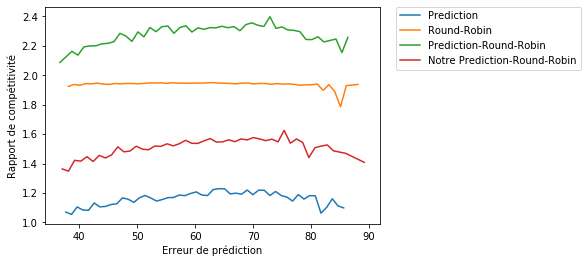

In [44]:
## Superposons les graphes
### Partie A
show_multiple_sims(resA)

Ce graphique présente les maximas des rapports de compétitivité pour chaque fonction implémentée en fonction des erreurs de prédiction. On observe que pour toutes les fonctions sauf round robin, plus l'erreur de prédiction est grande, plus le rapport de compétitivité l'est aussi, avec une légère baisse à partir des erreurs de prédictions égales à 60. Note : cette baisse n'est probablement pas significative et doit dépendre de la manière dont les données sont générées.

On constate que Prediction obtient les meilleurs résultats, bien qu'il faille prendre du recul puisque les prédictions sont générées aléatoirement avec des paramètres fixés arbitrairement et qu'ici les prédictions sont très bonnes (très proches de la réalité). Ensuite, la meilleure fonction est notre Prediction-round-robin, suivie de round-robin et enfin prediction-round-robin.

À présent nous étudions l'impact d'une qualité médiocre de prédiction sur les rapports de compétitivité des fonctions.

In [45]:
## Pour la partie A
S = 10
resA2 = []
resA2.append(simulation2(spt, f=prediction, sigma=S, legende="Prediction"))
#resA2.append(simulation2(spt, f=prediction, sigma=5, legende="Prediction sigma 5"))
resA2.append(simulation2(spt, f=round_robin, sigma=S, legende="Round-Robin"))
resA2.append(simulation2(spt, f=pred_round_robin, sigma=S, legende = "Prediction-Round-Robin"))
resA2.append(simulation2(spt, f=pred_round_robin2, sigma=S, legende = "Notre Prediction-Round-Robin") )


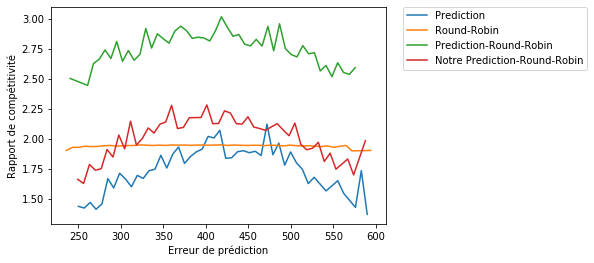

In [46]:
## Superposons les graphes
### Partie A
show_multiple_sims(resA2)

En augmentant sigma, et donc en diminuant la qualité des prédictions, on observe une dégradation du rapport de compétitivité de toutes les fonctions utilisant la prédiction (ce dernier augmente par rapport au dernier graphique, s'éloignant ainsi de 1). La fonction Round-Robin, elle, reste non-impactée et semble être un meilleur choix quand une prédiction de qualité ne peut être pas obtenue, nous assurant un rapport de compétitivité inférieur ou égal à 2 (nous rappelons que les rapports de compétitivité choisis ici sont les pires trouvés pour les classes d'erreur de prédiction, voir la fonction simulation2 pour plus de détails).

## Partie B

Dans cette partie, nous considèrons que toutes les tâches n'arrivent pas au même moment et donc qu'il faut les ordonnancer à mesure qu'elles arrivent. Les dates d'arrivée des tâches sont générées aléatoirement selon une distribution equiprobable bornée entre 0 et la plus petite durée de tâche multipliée par le nombre de tâches.

In [47]:
## Pour la partie B
S = 1.5

resB = []
resB.append(simulation2(sptB, f=predictionB, partie="B", sigma=S, legende="Prediction Partie B"))
#resB.append(simulation2(sptB, f=predictionB, partie="B", sigma=5, legende="Prediction Partie B sigma 5"))
resB.append(simulation2(sptB, f=round_robinB, partie="B", sigma=S, legende="Round-Robin Partie B"))
resB.append(simulation2(sptB, f=pred_round_robinB, partie="B", sigma=S, legende="Prediction-Round-Robin Partie B"))
resB.append(simulation2(sptB, f=pred_round_robinB2, partie="B", sigma=S, legende="Notre Prediction-Round-Robin Partie B") )

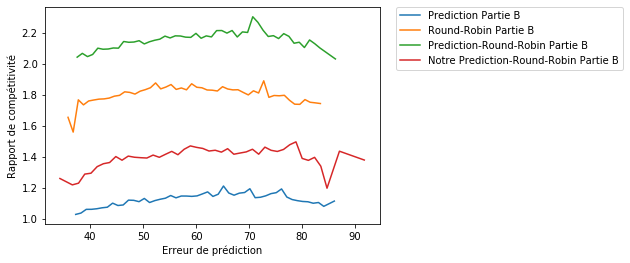

In [48]:
## Superposons les graphes
### Partie B
show_multiple_sims(resB)

Ce graphique présente les maximums de rapport de compétitivité pour chaque fonction implémentée en fonction des erreurs de prédiction. Dans cette partie les tâches ont également une date d'arrivée.

L'analyse est la même que pour la partie A, à la différence qu'ici, la fonction Round-Robin n'est plus aussi constante qu'avant. Elle montre toutefois une efficacité similaire à celle qu'elle avait dans la partie A.

In [49]:
## Pour la partie B
S = 10

resB2 = []
resB2.append(simulation2(sptB, f=predictionB, partie="B", sigma=S, legende="Prediction Partie B"))
#resB2.append(simulation2(sptB, f=predictionB, partie="B", sigma=5, legende="Prediction Partie B sigma 5"))
resB2.append(simulation2(sptB, f=round_robinB, partie="B", sigma=S, legende="Round-Robin Partie B"))
resB2.append(simulation2(sptB, f=pred_round_robinB, partie="B", sigma=S, legende="Prediction-Round-Robin Partie B"))
resB2.append(simulation2(sptB, f=pred_round_robinB2, partie="B", sigma=S, legende="Notre Prediction-Round-Robin Partie B") )

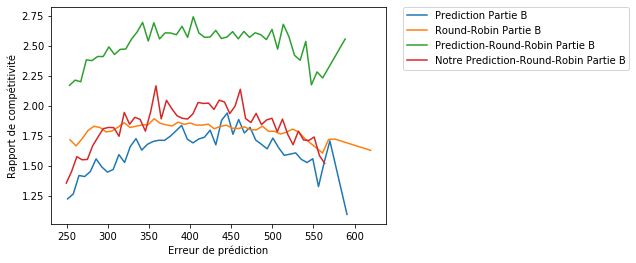

In [50]:
## Superposons les graphes
### Partie B avec un grand sigma
show_multiple_sims(resB2)

Ici avec une prédiction dégradée, on observe le même comportement que dans la partie A (sans les dates d'arrivée).

## Variabilité de la qualité de prédiction

Dans cette partie, nous allons faire varier le paramètre sigma qui entre en jeu pour la génération des dates prédites, suivant une distribution normale.

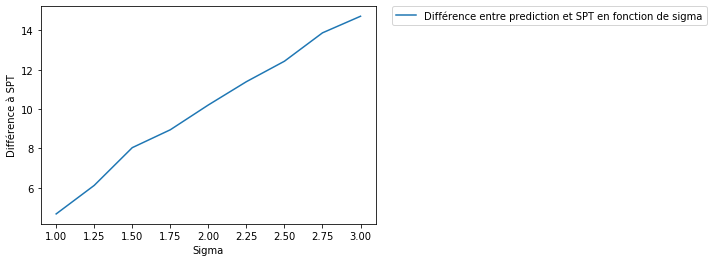

In [51]:
sigmas = [1+i*0.25 for i in range(int(2/0.25)+1)]
nbTaches = 10
Y = []
for s in sigmas:
    subY = []
    for _ in range(1000):

        vrai = [np.random.pareto(alpha)+1 for i in range(nbTaches)]
        bruit = np.random.randn(nbTaches)*s
        pred = [round(vrai[i] + bruit[i], 2) for i in range(nbTaches)]

        subY.append(abs(spt(vrai)[1] - prediction(pred, vrai)[1]))

    Y.append(np.mean(subY))

plt.plot(sigmas, Y, label="Différence entre prediction et SPT en fonction de sigma")
#plt.plot(X, Y, label=legende)

plt.xlabel('Sigma')
plt.ylabel('Différence à SPT')
#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Comme attendu, plus le sigma augmente, plus la différence entre le résultat de prediction et la solution optimale est grande, et ce de manière linéaire.

## Conclusion

Nos résultats montrent que Round-Robin présente expérimentalement un rapport de compétitivité borné à 2-OPT. L'utilité des fonctions de prédiction dépend directement de la qualité des prédictions, et n'ont pas d'intérêt si cette dernière est médiocre. L'association de Prediction et de Round-Robin n'a pas montré d'avantage sur les autres fonctions et performe même moins bien que celles-ci.